<a href="https://colab.research.google.com/github/baihelahusain/NMIET_DS_WORKSHOP/blob/main/E_Furniture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
data = pd.read_csv('/content/ecommerce_furniture_dataset_2024.csv')
data


,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
...,...,...,...,...,...
1995,Modern TV Stand Entertainment Center with Two ...,NaN,$72.49,8,Free shipping
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",NaN,$276.65,2,Free shipping
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",NaN,$196.44,10,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,NaN,$228.18,0,Free shipping


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [33]:
data.isnull()

,productTitle,originalPrice,price,sold,tagText
0,False,True,False,False,False
1,False,True,False,False,False
2,False,False,False,False,False
3,False,True,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,True,False,False,False
1996,False,True,False,False,False
1997,False,True,False,False,False
1998,False,True,False,False,False


In [20]:
data.isnull().sum()

,0
productTitle,0
originalPrice,1513
price,0
sold,0
tagText,3


In [35]:
data.shape


(2000, 5)

In [37]:
data['originalPrice'] = data['originalPrice'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
data['originalPrice'].fillna(data['originalPrice'].median(), inplace=True)
data['tagText'].fillna('Unknown', inplace=True)
print(data.isnull().sum())

productTitle     0
originalPrice    0
price            0
sold             0
tagText          0
dtype: int64


<ipython-input-37-f930dd777ebb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['originalPrice'].fillna(data['originalPrice'].median(), inplace=True)
<ipython-input-37-f930dd777ebb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

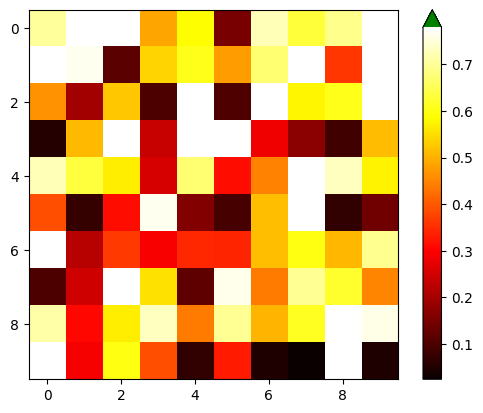

In [40]:
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame(data)

threshold = 0.8
df = np.random.random((10,10))
df= np.ma.masked_greater(df, threshold)

fig, ax = plt.subplots()
im = ax.imshow(df, cmap=plt.cm.hot, interpolation='none')
cbar = fig.colorbar(im, extend='max')
cbar.cmap.set_over('green')

plt.show()

In [42]:
import seaborn as sns

In [45]:
def parse_shipping(tag_text):
    # Convert to string, strip whitespace, and make lowercase
    text = str(tag_text).strip().lower()

    # If the text contains "free", return 0.0
    if "free" in text:
        return 0.0

    # Use a regular expression to find a number after a "$"
    match = re.search(r"\$([\d\.]+)", text)
    if match:
        return float(match.group(1))

    # If no match, return None (or 0.0, depending on your preference)
    return None

# Create a new column in the DataFrame with the parsed shipping cost
data["shipping_cost"] = data["tagText"].apply(parse_shipping)

# Inspect the results
print(data[["tagText", "shipping_cost"]].head())



         tagText  shipping_cost
0  Free shipping            0.0
1  Free shipping            0.0
2  Free shipping            0.0
3  Free shipping            0.0
4  Free shipping            0.0


In [47]:
# Drop rows with missing shipping_cost (if needed)
# data = data.dropna(subset=["shipping_cost"])

# Calculate Q1, Q3, and IQR
Q1 = data["shipping_cost"].quantile(0.25)
Q3 = data["shipping_cost"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag rows that are outliers
data["is_outlier"] = (data["shipping_cost"] < lower_bound) | (data["shipping_cost"] > upper_bound)

# Optionally cap (winsorize) the outliers at the upper bound
data.loc[data["shipping_cost"] > upper_bound, "shipping_cost"] = upper_bound

# Show summary statistics after capping
print(data["shipping_cost"].describe())

count    1997.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: shipping_cost, dtype: float64


In [51]:
features = ['productTitle', 'originalPrice', 'price', 'tagText']
target = 'sold'

In [52]:
X = data[features]
y = data[target]

In [53]:
X = pd.get_dummies(X, columns=['productTitle', 'tagText'])


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = model.predict(X_test)

In [63]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3564.214772108186
